#Goals in this project

Starr by gathering comprehensive data related to all aspect of food delivery operations
Clean the dataset for inconsistencies, missing values, or irrelevant information
Extract relevant features that could impact cost and profitability
Break down the cost associated with each order, including fixed costs (like packaging) and variable costs (like delivery fees and discounts)
Determine the revenue generated from each order, focusing on commission fees and the order value before discounts
For each order, calculate the profit by subtracting the total costs from the revenue. Analize the distribution of profitability across all orders to identify trends
Basedon the cost and profitability analysis, develop strategic recommendations aimed at enhancing profitability
Use the data to simulate the financial impact of proposed changes, such as adjusting discount or commision rates


In [2]:
# Import the library

import pandas as pd

In [3]:
food_orders = pd.read_csv("food_orders_new_delhi.csv")
print(food_orders.head())

   Order ID Customer ID Restaurant ID  Order Date and Time  \
0         1       C8270         R2924  2024-02-01 01:11:52   
1         2       C1860         R2054  2024-02-02 22:11:04   
2         3       C6390         R2870  2024-01-31 05:54:35   
3         4       C6191         R2642  2024-01-16 22:52:49   
4         5       C6734         R2799  2024-01-29 01:19:30   

  Delivery Date and Time  Order Value  Delivery Fee    Payment Method  \
0    2024-02-01 02:39:52         1914             0       Credit Card   
1    2024-02-02 22:46:04          986            40    Digital Wallet   
2    2024-01-31 06:52:35          937            30  Cash on Delivery   
3    2024-01-16 23:38:49         1463            50  Cash on Delivery   
4    2024-01-29 02:48:30         1992            30  Cash on Delivery   

  Discounts and Offers  Commission Fee  Payment Processing Fee  \
0            5% on App             150                      47   
1                  10%             198                  

In [4]:
print(food_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB
None


The dataset contains 1,000 entries and 12 columns, with no missing values in any of the columns. Now, we need to perform some data cleaning and preparation. Below are the necessary cleaning steps we need to take

Data cleaned steps
Convert "Order Date and Time" and "Delivery Date and Time" To a datetime format
Convert "Discounts and Offers" to a cosistent numeric value (if applicable) or calculate the discount amounts
Ensure all monetary values in a suitable format for calculations

In [5]:
import pandas as pd
from datetime import datetime

# Supongamos que food_orders es tu DataFrame
# food_orders = pd.read_csv('tu_archivo.csv')

# Convert date and time columns to datetime
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

# Function to extract numeric values from the 'Discounts and Offers' string
def extract_discount(discount_str):
    if isinstance(discount_str, str):
        if 'off' in discount_str:
            # Fixed amount off
            return float(discount_str.split(' ')[0])
        elif '%' in discount_str:
            # Percentage off
            return float(discount_str.split('%')[0])
    # No discount or invalid format
    return 0.0

# Apply the function to create a new 'Discount Percentage' column
food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(extract_discount)

# For percentage discounts, calculate the discount amount based on the order value
food_orders['Discount Amount'] = food_orders.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                  if x['Discount Percentage'] > 1
                                                  else x['Discount Percentage'], axis=1)

# Adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
food_orders['Discount Amount'] = food_orders.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

# Print the relevant columns and their data types
print(food_orders[['Order Value', 'Discounts and Offers', 'Discount Percentage', 'Discount Amount']].head())
print(food_orders.dtypes)


   Order Value Discounts and Offers  Discount Percentage  Discount Amount
0         1914            5% on App                  5.0            95.70
1          986                  10%                 10.0            98.60
2          937         15% New User                 15.0           140.55
3         1463                  NaN                  0.0             0.00
4         1992         50 off Promo                 50.0           996.00
Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method                    object
Discounts and Offers              object
Commission Fee                     int64
Payment Processing Fee             int64
Refunds/Chargebacks                int64
Discount Percentage              float64
Discount Amount        

The data is now ready with the following adjustments
1. Order Date and Time and delivery Date and Time columns have been converted to datetime format
2. A new column, Discount Amount, has been calculate based on the Discounts and Offers column. This was achieved by extracting percentage discounts or fixed amounts and applying them to the order value
3. Discount Percentage has been added to represent the discount rate or fixed amount discount directly

Cost and Profitability Analysis
For the cost analysis, well consider the following costs associated with each order:

1. Delivery fee: the fee charged for delivery the order
2. Payment Processing Fee: The fee for processing the payment
3. Discount Amount: The discount provided on the order

We'll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure

The revenue for the platform is mainly derived from the Commission Fee. we'll calculate the next profit by subtracting the total cost (including discounts) from the revenue generated through commission fees

Let's proceed with the cost and profitality analysis:

In [6]:
#Calculate total costs and revenue per order
food_orders['Total Costs'] = food_orders['Delivery Fee'] + food_orders['Payment Processing Fee'] + food_orders['Discount Amount']
food_orders['Revenue'] = food_orders['Commission Fee']
food_orders['Profit'] = food_orders['Revenue'] - food_orders['Total Costs']

# Aggregate data to get overall metrics
total_orders = food_orders.shape[0]
total_revenue = food_orders['Revenue'].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders['Profit'].sum()

overall_metrics ={
    "Total Orders" : total_orders,
    "Total Revenue" : total_revenue,
    "Total Costs" : total_costs,
    "Total Profit" : total_profit
}

print(overall_metrics)

{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.85, 'Total Profit': -105719.85}


Base on the analysis, here are the overall metrics for the food delivery operations
1. Total Orders: 1,000
2. Total Revenue (from commision fees): 126,990 INR
3. Total Cost 232,709.85 INR (including delivery fees, payment processing fees, and discounts)
4. Total Profit: -105,719.85
   

The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggest that the current commision rates, delivery fees, and discount strategies migth not be sustainable for profitability

To better understand the distribution of costs, revenue, and profit, let's plot:

1. A histogram of profits per order to visualize the distribution of profitable and unprofitable orders.
2. A pie chart to visualize the proportion of total costs ( delivery fees, payment processing fees, and discounts)
3. A bar chart to compare total revenue, total costs, and total profit

Let's plot the histogram first


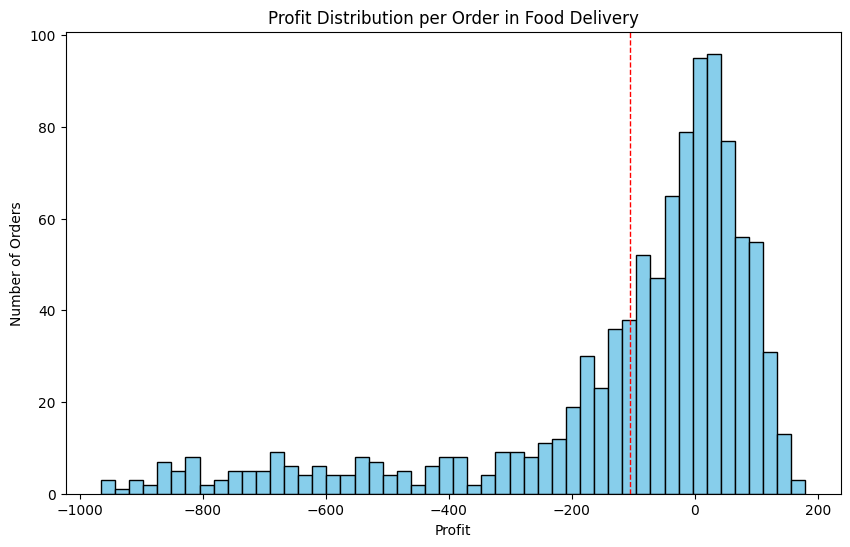

In [7]:
import matplotlib.pyplot as plt

# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(food_orders['Profit'], bins=50, color ='skyblue', edgecolor='black')
plt.title('Profit Distribution per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(food_orders['Profit'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.show()

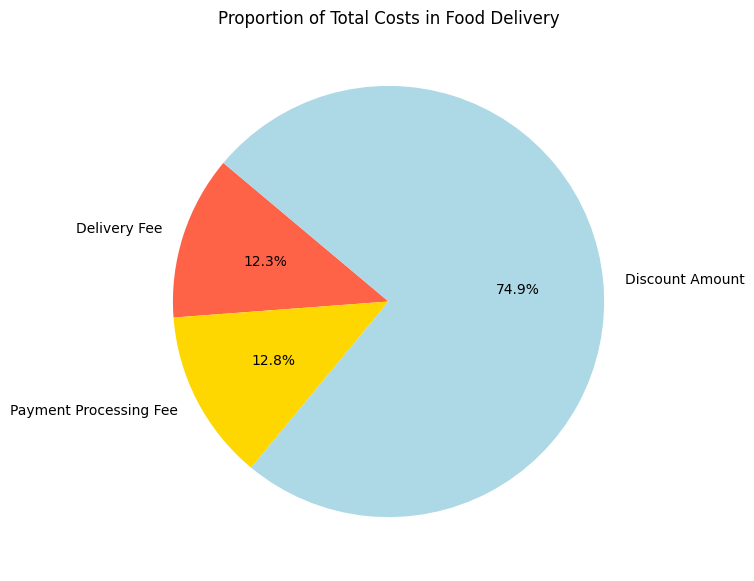

In [8]:
# pie chart for the proportion of total costs
costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(7, 7))
plt.pie(costs_breakdown, labels=costs_breakdown.index, autopct='%1.1f%%', startangle=140, colors=['tomato', 'gold', 'lightblue'])
plt.title('Proportion of Total Costs in Food Delivery')
plt.show()

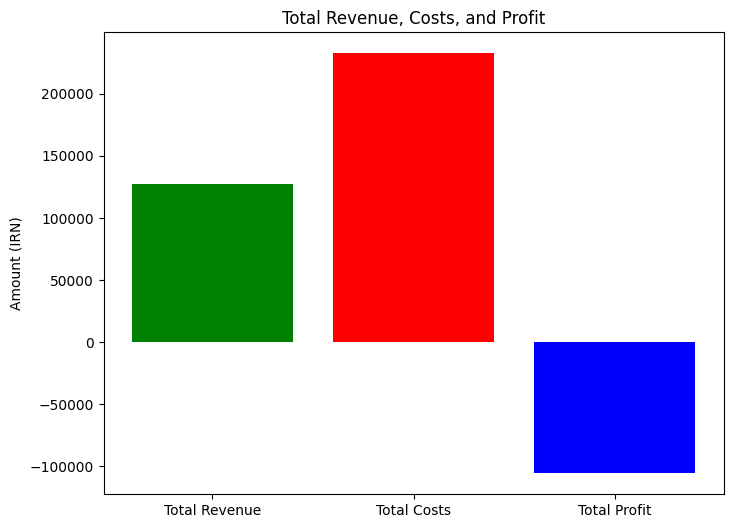

In [9]:
# bar chart for total revenue, cost, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color =['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (IRN)')
plt.show()

The bar chart compares total revenue, total costs, and total profit. It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a total loss

# A New strategy for Profits

From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. Specifically, we need to look for:

1. A new average commission percentage based on profitable orders
2. A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability

Given these new averages, we can suggest adjustments that might not only make individual orders profitable but also apply broadly across all orders to improve overall profitability. Let's calculate:


In [10]:
# The average commission percentage for profitable orders
# The average discount percentage for profitable orders

# Filter the dataset for profitable orders

profitable_orders = food_orders[food_orders['Profit'] > 0]

# Calculate the average commission percentage for profitable order
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

# Calculate the average discount percentage for profitable orders
profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100

# Calculate the new average
new_avg_commission_percentage = profitable_orders['Commission Percentage'].mean()
new_avg_discount_percentage = profitable_orders['Effective Discount Percentage'].mean()

print(new_avg_commission_percentage, new_avg_discount_percentage)




30.508436145149435 5.867469879518072


C:\Users\T14\AppData\Local\Temp\ipykernel_15772\2192049783.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100
C:\Users\T14\AppData\Local\Temp\ipykernel_15772\2192049783.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Effective Discount Percentage'] = (profitable_orders['Discount Amount'] / profitable_orders['Order Value']) * 100


Based on the analysis of profitable orders, we find a new set of averages that could represent a "sweet spot" for commission and discount percentages:

1. New Average Commision Percentage: 30.51%
2. New Average Discount Percentage: 5.87% 

The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability. The average discount percentage for profitable orders is notably lower than the overall average, indicating that lower discount might contribute to profitability without significantly deterring order volume

Based on this analysis, a strategy that aims for a commission rate closer to 30% and a discount rate around 6% could potentially improve profitability across the board

Now, let's visualize a comparison of profitability using actual versus recommended discounts and commission across all orders. For this, we need to:

1. Calculate the profitability per order using the actual discounts and commissions already present in the dataset
2. Simulate profitability per order using recommended discount (6%) and commission (30%) to see the potencial impact on profitability

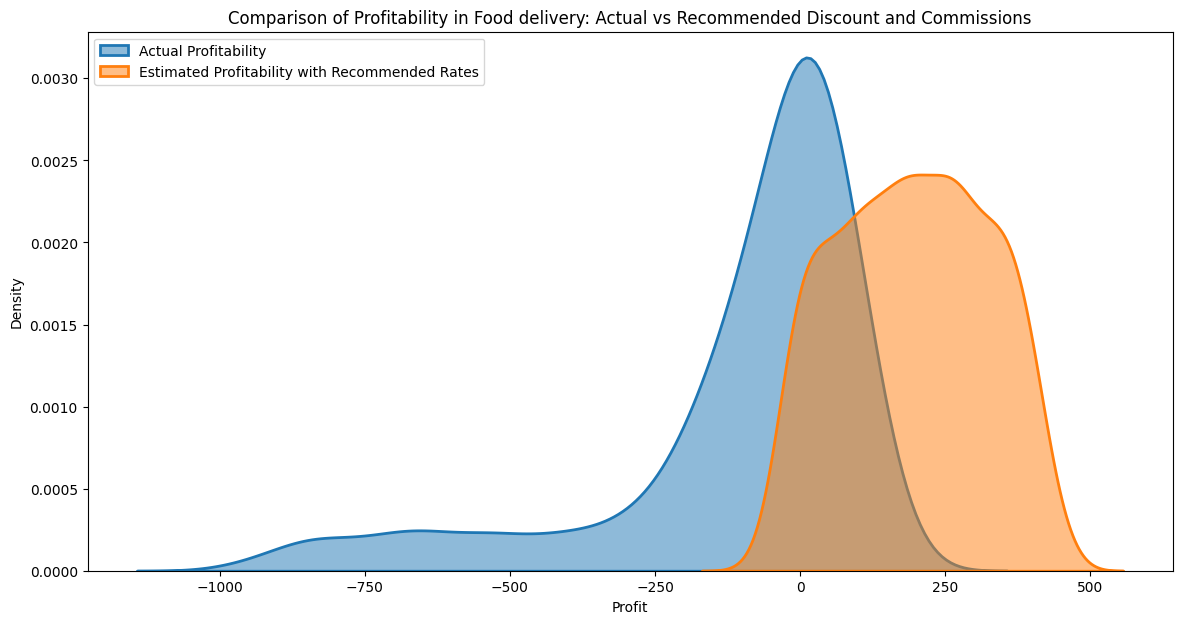

In [12]:
# Simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0 #30%
recommended_discount_percentage = 6.0 #6%

#Calculate the simulated commission fee and discount using recommended percentage
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission_percentage / 100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount_percentage / 100)

#Recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee'] +
                                        food_orders['Payment Processing Fee']+
                                        food_orders['Simulated Discount Amount'])

food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee'] -
                                   food_orders['Simulated Total Costs'])

#Visualizing the comparison
import seaborn as sns

plt.figure(figsize=(14, 7))

# Actual profitability
sns.kdeplot(food_orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# Simulated profitability
sns.kdeplot(food_orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food delivery: Actual vs Recommended Discount and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

The visualization compares the distribution of profitability per order using actual discount and commissions versus the simulated scenario with recommended discounts (6%) and commissions (30%)

The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses (profit < 0) and broad spread of profit levels for orders. The simulated scenario suggests a shift toward higher profitability per order. The distribution is more skewed toward positive, indicating that the recommended adjustments could lead to a higher proportion of profitable orders